# What does a CNN model sees ?
In this notebook we are going under the hood and see what a CNN ML model sees in one of it's filter layers. This will give us insight into how ML model extracts features from the input.

## Model
Model is exactly the same that we used in [ConvMnistFashion][/ConMnistFashion.ipynb].  

In [2]:
import tensorflow as tf
import numpy as np

# load mnist fashion data
data = tf.keras.datasets.fashion_mnist
(trainImgs, trainLabels), (valImgs, valLabels) = data.load_data()

# normalize and reshape data
trainImgs = trainImgs.reshape(60000, 28, 28, 1)
trainImgs = trainImgs/255.0
valImgs = valImgs.reshape(10000, 28, 28, 1)
valImgs = valImgs/255.0

# create model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            32, 
            (3,3), 
            activation=tf.nn.relu, 
            input_shape=(28,28,1)
        ),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(
            32,
            (3,3),
            activation=tf.nn.relu,
        ),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(
            units=20, 
            activation=tf.nn.relu
        ),
        tf.keras.layers.Dense(
            units=10,
            activation=tf.nn.softmax
        )
    ]
)

# compile the model
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# get summar og the mdoel
model.summary()

# Train the model
model.fit(trainImgs, trainLabels, validation_data=(valImgs, valLabels), epochs=5)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                16020     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

## Manual look up under the hood
Let's see how model learns by checking out what the model is seeing during inference.

In [4]:
# shows first 100 labels. Note label 9 (Ankle Boot). It is at position 0, 11, 15, 23, 28 etc.
print(trainLabels[:100])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3 6 6 0 8 5
 2 1 6 6 7 9 5 9 2 7 3 0 3 3 3 7 2 2 6 6 8 3 3 5 0 5 5 0 2 0 0 4 1 3 1 6 3
 1 4 4 6 1 9 1 3 5 7 9 7 1 7 9 9 9 3 2 9 3 6 4 1 1 8]


We can have a look at the layer data and make the model to predict an inference while visualizing the layer data to see what model is seeing. Let's use Ankle Boot label #9 as an example.

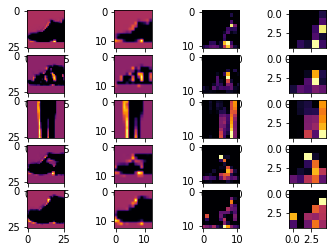

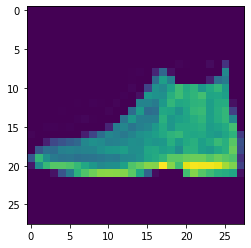

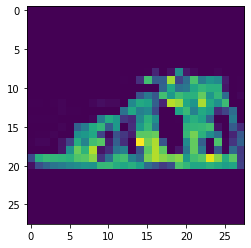

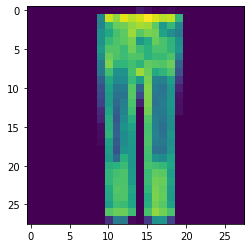

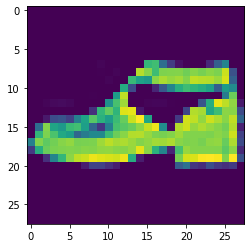

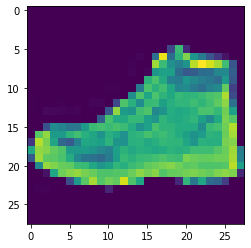

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

# Indices of the Ankle boot in the first 100 labels
FIRST_IMG=0
SECOND_IMG=11
THIRD_IMG=15
FOURTH_IMG=23
FIFTH_IMG=28

# let's check the 2nd filter, i.e., convolution number 1
CONVOLUTION_NUMBER=1 

def showImg(index):
    plt.figure()
    plt.grid(False)
    plt.imshow(valImgs[index].reshape(28,28))
    plt.show()

layerOutputs = [layer.output for layer in model.layers]
activeModel = tf.keras.models.Model(inputs=model.inputs, outputs=layerOutputs)
# create subplot playground
f,axes = plt.subplots(5,4)

for i in range(0,4):
    f1 = activeModel.predict(valImgs[FIRST_IMG].reshape(1,28,28,1))[i]
    axes[0,i].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axes[0,i].grid(False)
    f2 = activeModel.predict(valImgs[SECOND_IMG].reshape(1,28,28,1))[i]
    axes[1,i].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axes[1,i].grid(False)
    f3 = activeModel.predict(valImgs[THIRD_IMG].reshape(1,28,28,1))[i]
    axes[2,i].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axes[2,i].grid(False)
    f4 = activeModel.predict(valImgs[FOURTH_IMG].reshape(1,28,28,1))[i]
    axes[3,i].imshow(f4[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axes[3,i].grid(False)
    f5 = activeModel.predict(valImgs[FIFTH_IMG].reshape(1,28,28,1))[i]
    axes[4,i].imshow(f5[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axes[4,i].grid(False)

showImg(FIRST_IMG)
showImg(SECOND_IMG)
showImg(THIRD_IMG)
showImg(FOURTH_IMG)
showImg(FIFTH_IMG)

Something messed up is going on. 3rd image is labeled as Ankle Boot, but it's actually a trouser. 